Importing headers

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

Importing data

In [3]:
data=pd.read_excel("C:/Users/Dell/Desktop/BA project/christ college atm.xlsx")

Exploring data

In [4]:
data.columns

Index(['ATM Name', 'Transaction Date', 'No Of Withdrawals',
       'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
       'Total amount Withdrawn', 'Amount withdrawn XYZ Card',
       'Amount withdrawn Other Card', 'Weekday', 'Festival Religion',
       'Working Day', 'Holiday Sequence'],
      dtype='object')

In [5]:
data.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Christ College ATM,2011-01-01,74,25,49,287700,148200,139500,Saturday,C,H,WHH
1,Christ College ATM,2011-01-02,80,24,56,300000,95600,204400,Sunday,NH,H,HHW
2,Christ College ATM,2011-01-03,108,46,62,522800,210900,311900,Monday,NH,W,WWW
3,Christ College ATM,2011-01-04,143,41,102,737400,238000,499400,Tuesday,NH,W,WWW
4,Christ College ATM,2011-01-05,95,41,54,387300,213600,173700,Wednesday,NH,W,WWW


In [37]:
data.shape

(2355, 12)

In [38]:
data.describe()

,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card
count,2355.000000,2355.000000,2355.000000,2.355000e+03,2355.000000,2.355000e+03
mean,123.654777,50.511677,73.143100,5.568191e+05,271470.955414,2.853482e+05
std,51.909708,17.170127,42.447573,2.764720e+05,128770.202238,1.990349e+05
min,1.000000,0.000000,0.000000,1.000000e+02,0.000000,0.000000e+00
25%,88.500000,39.000000,44.000000,3.597500e+05,178000.000000,1.454000e+05
50%,119.000000,51.000000,65.000000,5.204000e+05,258700.000000,2.409000e+05
75%,152.000000,62.000000,93.000000,7.131000e+05,351150.000000,3.637500e+05
max,373.000000,121.000000,310.000000,1.909500e+06,775800.000000,1.472600e+06


Data transformation

In [6]:
features=data.copy()

In [7]:
features['Weekday Id']=data['Weekday'].astype("category").cat.codes
days={"Sunday":0,"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"SUNDAY":0,"MONDAY":1,"TUESDAY":2,"WEDNESDAY":3,"THURSDAY":4,"FRIDAY":5,"SATURDAY":6}
for i in range(data.shape[0]):
    features.loc[i,"Weekday Id"]=days[data.loc[i,"Weekday"]]
features['Festival Religion Id']=data['Festival Religion'].astype("category").cat.codes
features['Working Day Id']=data['Working Day'].astype("category").cat.codes
features['Holiday Sequence Id']=data['Holiday Sequence'].astype("category").cat.codes

In [8]:
features.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Weekday Id,Festival Religion Id,Working Day Id,Holiday Sequence Id
0,Christ College ATM,2011-01-01,74,25,49,287700,148200,139500,Saturday,C,H,WHH,6,0,0,4
1,Christ College ATM,2011-01-02,80,24,56,300000,95600,204400,Sunday,NH,H,HHW,0,4,0,1
2,Christ College ATM,2011-01-03,108,46,62,522800,210900,311900,Monday,NH,W,WWW,1,4,1,7
3,Christ College ATM,2011-01-04,143,41,102,737400,238000,499400,Tuesday,NH,W,WWW,2,4,1,7
4,Christ College ATM,2011-01-05,95,41,54,387300,213600,173700,Wednesday,NH,W,WWW,3,4,1,7


Data Cleaning and splitting

In [9]:
x= features[["No Of Withdrawals","Weekday Id","Festival Religion Id","Working Day Id","Holiday Sequence Id"]]
x = (x-x.min())/(x.max()-x.min())
y= features['Total amount Withdrawn'].copy()
y=(y-y.min())/(y.max()-y.min())
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle= False, test_size = 0.2, random_state = 42)

Linear Regression

In [10]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
linpred=model.predict(x_test).round(decimals=0)

In [11]:
model.score(x_test,y_test)

0.8714280779073494

Xgboost Regressor

In [30]:
import xgboost as xg
l=[]
for i in range(5,50,5):
    xgb=xg.XGBRegressor(n_estimators=i)
    xgb.fit(x_train,y_train)
    l.append(xgb.score(x_test,y_test))

In [31]:
l

[0.8297321649617277,
 0.8628517343461116,
 0.8582017759678199,
 0.8562441721486465,
 0.8531587040408571,
 0.8515706855069658,
 0.8502175468961193,
 0.8470546226050155,
 0.8452276764217553]

In [34]:
xgb=xg.XGBRegressor(n_estimators=10)
xgb.fit(x_train,y_train)
xgb.score(x_test,y_test)

0.8628517343461116

OLS Model

In [16]:
import statsmodels.api as sm
model1=sm.OLS(y_train,x_train).fit()
predictions=model1.predict(x_test)
print(r2_score(y_test,predictions))

0.8660300293246335


Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
list=[]
no=[]
for i in range(50,100,5):
    classifier = RandomForestRegressor(n_estimators = i)
    classifier.fit(x_train, y_train)
    list.append(classifier.score(x_test,y_test))
    no.append(i)

In [24]:
max(list)

0.8406011155012834

In [25]:
np.argmax(list)

9

In [26]:
classifier = RandomForestRegressor(n_estimators = no[9])
classifier.fit(x_train, y_train)
classifier.score(x_test,y_test)

0.8378766226965635

Support Vector Regressor

In [35]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.8660514670913181

Prophet model

In [71]:
from fbprophet import Prophet

In [104]:
df=features[["Transaction Date","Total amount Withdrawn"]]
df["Transaction Date"]=pd.to_datetime(df["Transaction Date"])
df.columns=["ds","y"]
model=Prophet()
model.fit(df)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [105]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [106]:
df.tail()

,ds,y
2350,2017-09-25,755300
2351,2017-09-26,325300
2352,2017-09-27,722600
2353,2017-09-28,1120300
2354,2017-09-29,700400


In [107]:
future_dates=model.make_future_dataframe(periods=365)

In [108]:
predictions=model.predict(future_dates)

In [109]:
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01,264564.099896,53021.371215,617527.572493,264564.099896,264564.099896,77190.009441,77190.009441,77190.009441,99426.691285,99426.691285,99426.691285,-22236.681844,-22236.681844,-22236.681844,0.0,0.0,0.0,341754.109337
1,2011-01-02,264861.368790,-223039.421480,355461.610547,264861.368790,264861.368790,-199463.156382,-199463.156382,-199463.156382,-179984.536835,-179984.536835,-179984.536835,-19478.619547,-19478.619547,-19478.619547,0.0,0.0,0.0,65398.212409
2,2011-01-03,265158.637685,-24833.048789,554564.875270,265158.637685,265158.637685,7338.437185,7338.437185,7338.437185,24450.626962,24450.626962,24450.626962,-17112.189776,-17112.189776,-17112.189776,0.0,0.0,0.0,272497.074870
3,2011-01-04,265455.906579,-27639.974841,564954.456629,265455.906579,265455.906579,-6345.288996,-6345.288996,-6345.288996,8771.441883,8771.441883,8771.441883,-15116.730879,-15116.730879,-15116.730879,0.0,0.0,0.0,259110.617583
4,2011-01-05,265753.175474,-1154.842586,559574.461235,265753.175474,265753.175474,15885.264381,15885.264381,15885.264381,29343.873758,29343.873758,29343.873758,-13458.609377,-13458.609377,-13458.609377,0.0,0.0,0.0,281638.439855


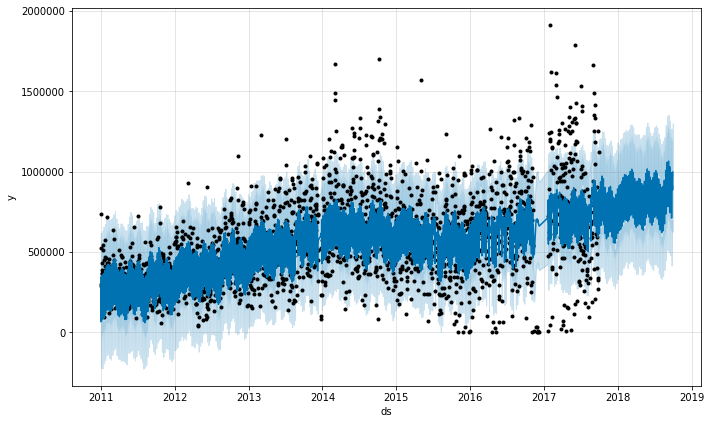

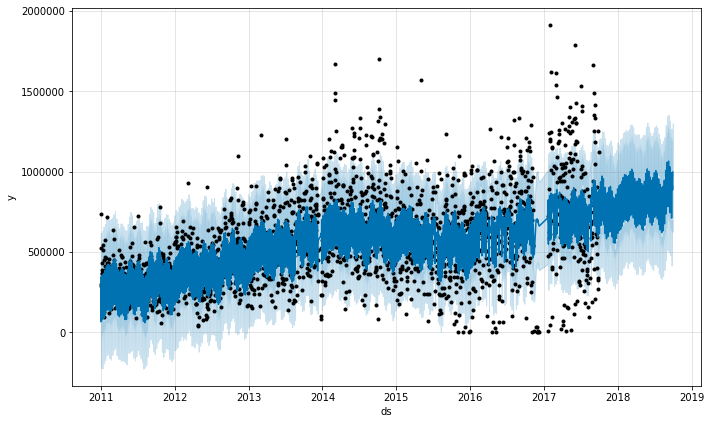

In [110]:
model.plot(predictions)

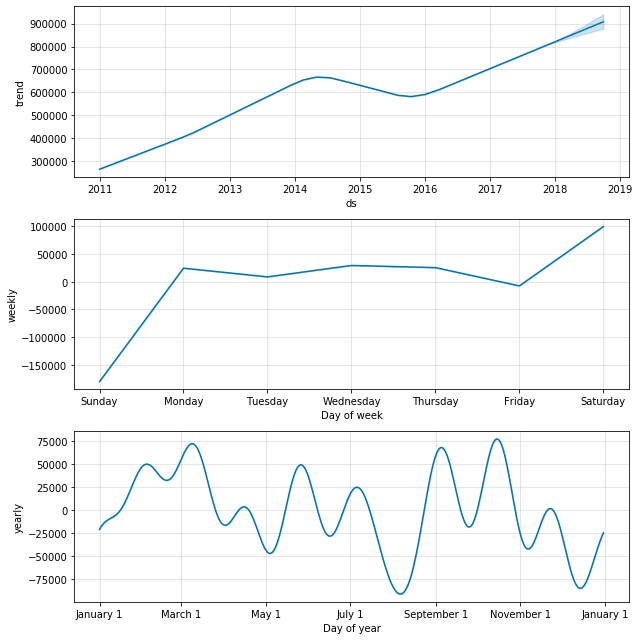

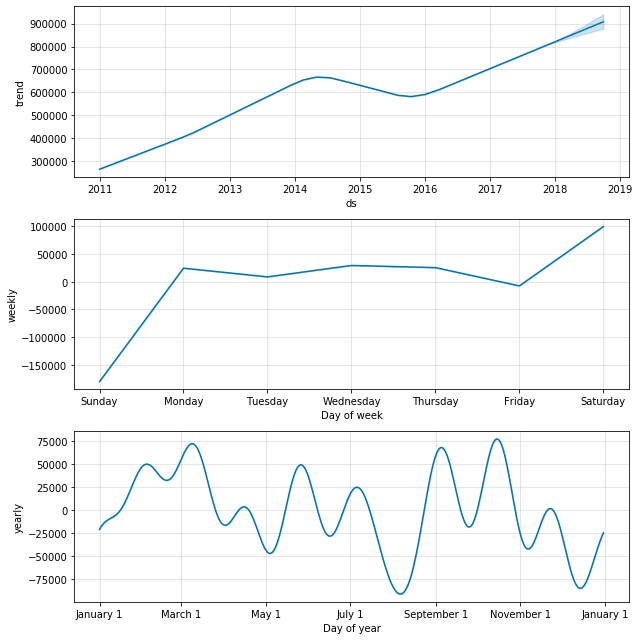

In [112]:
model.plot_components(predictions)

In [113]:
from fbprophet.diagnostics import cross_validation
df_cv=cross_validation(model,initial='730  days',period='180 days',horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 8 forecasts with cutoffs between 2013-04-18 00:00:00 and 2016-09-29 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-04-19,484478.605724,317546.977873,653959.712666,569700,2013-04-18
1,2013-04-20,538085.935973,372803.253652,711379.896089,525600,2013-04-18
2,2013-04-21,354169.499093,177229.955540,536544.914818,234500,2013-04-18
3,2013-04-22,460651.111223,284508.655268,622549.535351,334300,2013-04-18
4,2013-04-23,457573.811362,290879.101147,631125.361012,417000,2013-04-18


In [114]:
from fbprophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,35 days,6.224083e+10,249481.116516,198590.509950,2.349766,0.286014,0.619926
1,36 days,6.164832e+10,248290.806690,197191.162112,3.697211,0.276954,0.625461
2,37 days,5.991447e+10,244774.332997,193634.013226,3.692392,0.273633,0.636531
3,38 days,5.901709e+10,242934.335635,192704.200801,3.691149,0.271462,0.638376
4,39 days,5.852567e+10,241920.801802,192211.281691,3.690339,0.271295,0.640221


C:\Users\Dell\anaconda3\lib\site-packages\fbprophet\plot.py:517: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

C:\Users\Dell\anaconda3\lib\site-packages\fbprophet\plot.py:518: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



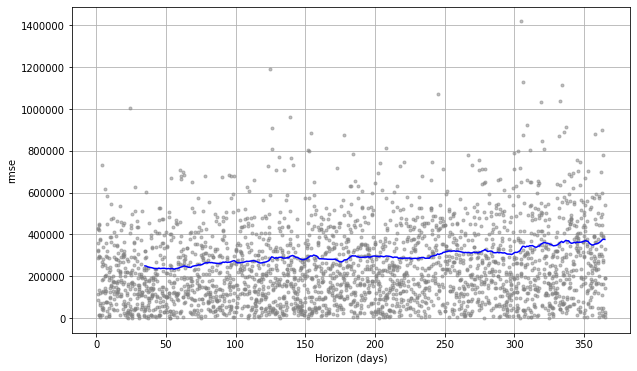

In [115]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric="rmse")